In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [3]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [4]:
#data.info()

In [5]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [8]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [9]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [10]:
data = pd.read_csv('./data/df_2017_formatted_with_zip.csv')

In [11]:
data.shape

(1105383, 24)

In [12]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
0,0.0,37115.0,PD201701303399,2017-12-28 12:16:00,20171131467,A,87,Safety Hazard,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,EXIT 14A BRILEY W,712A,M,11.0,1517.0,36.235,-86.721,"(36.235, -86.721)",12,28,POINT (-86.721 36.235)
1,0.0,37115.0,PD201701270716,2017-12-18 06:15:00,20171103003,C,46,Vehicle Accident - Personal Injury,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,EXIT 14A BRILEY W,225C,M,11.0,0.0,36.235,-86.721,"(36.235, -86.721)",12,18,POINT (-86.721 36.235)
2,0.0,37115.0,PD201701297182,2017-12-26 14:06:00,20171125960,A,87,Safety Hazard,P,PROGRESS,4,ASSISTED CITIZEN,0.0,EXIT 14A BRILEY W,711B,M,11.0,1517.0,36.235,-86.721,"(36.235, -86.721)",12,26,POINT (-86.721 36.235)
3,0.0,37115.0,PD201701267469,2017-12-17 01:08:00,20171100349,C,87,Safety Hazard,P,PROGRESS,4,ASSISTED CITIZEN,0.0,EXIT 14B BRILEY W,711C,M,11.0,0.0,36.236,-86.726,"(36.236, -86.726)",12,17,POINT (-86.726 36.236)
4,0.0,37115.0,PD201701267411,2017-12-17 00:41:00,20171100115,C,87,Safety Hazard,P,PROGRESS,5,GONE ON ARRIVAL,0.0,EXIT 14B BRILEY W,711C,M,11.0,1509.0,36.236,-86.726,"(36.236, -86.726)",12,17,POINT (-86.726 36.236)


In [13]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
1105378,NaN,NaN,PD201701313422,2017-12-31 21:54:00,20171140042,B,57,Fight / Assault,R,REPORT,10,NO RESPONSE,NaN,DR D B TODD JR BLVD,617C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1105379,NaN,NaN,PD201701313485,2017-12-31 22:33:00,20180000038,B,50,Theft,TV,NaN,1,M.P.D. REPORT COMPLED,NaN,WIMBLEDON RD,115C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1105380,NaN,NaN,PD201701313586,2017-12-31 23:19:00,20171140119,NaN,50,Theft,TV,NaN,1,M.P.D. REPORT COMPLED,0.0,4TH AV N,415C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1105381,NaN,NaN,PD201701313644,2017-12-31 23:47:00,20180000714,NaN,57,Fight / Assault,P,PROGRESS,6,ASSISTED OTHER UNIT,NaN,S SHORE DR,335A,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1105382,NaN,NaN,PD201701313666,2017-12-31 23:55:00,20171140162,NaN,43,Want Officer for Investigation / Assistance,R,REPORT,1,M.P.D. REPORT COMPLED,0.0,4TH AV N,415C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)


In [14]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [15]:
#data['tc_desc'].value_counts()

In [16]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

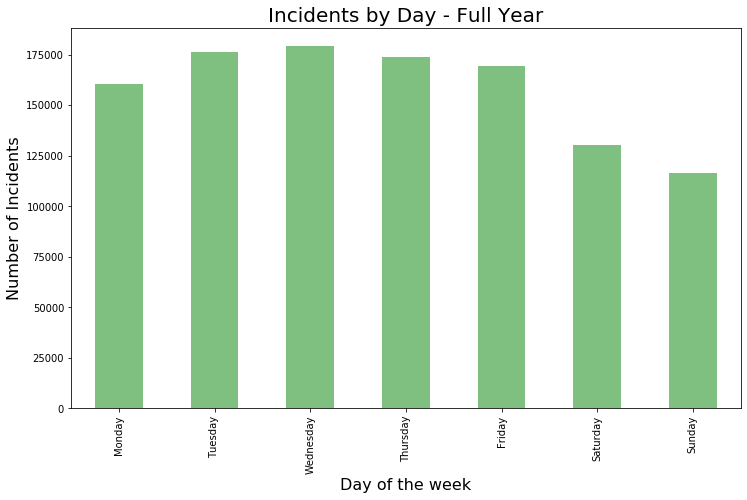

In [17]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

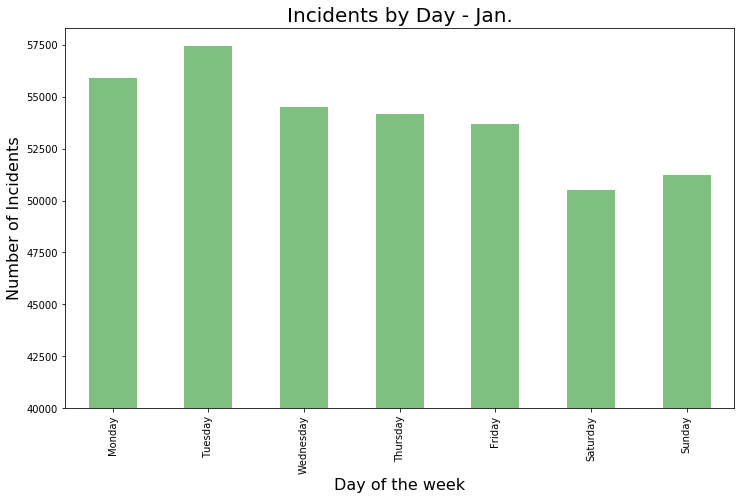

In [18]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

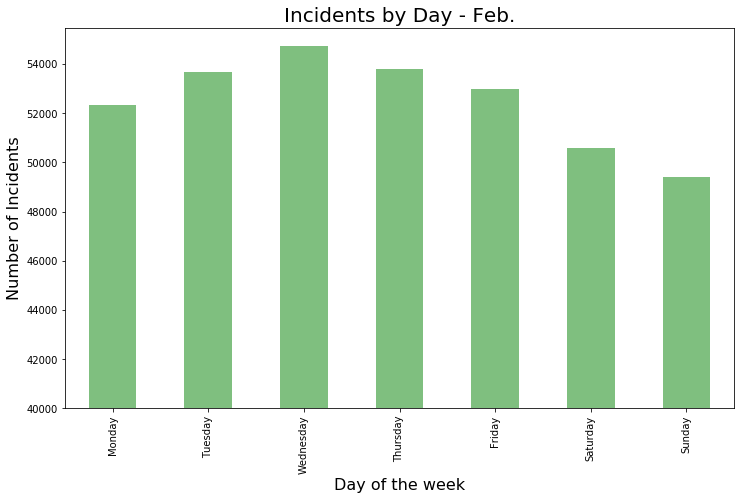

In [19]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

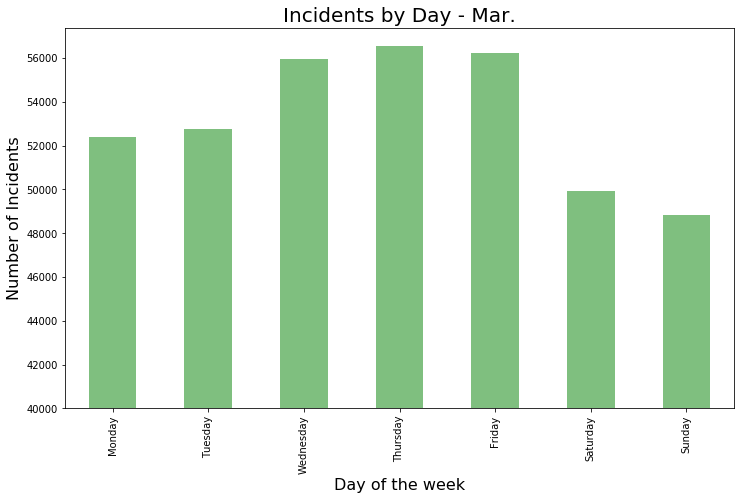

In [20]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

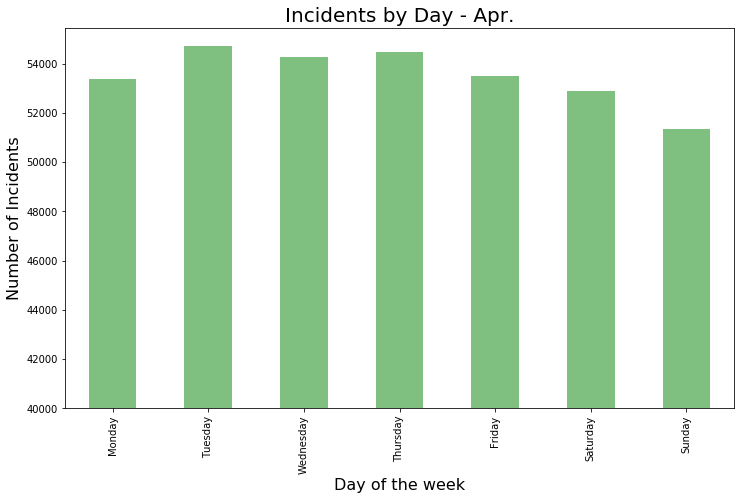

In [21]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

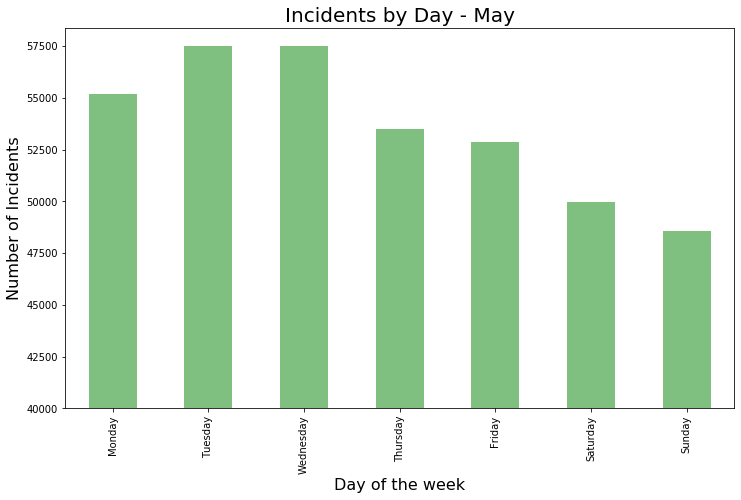

In [22]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

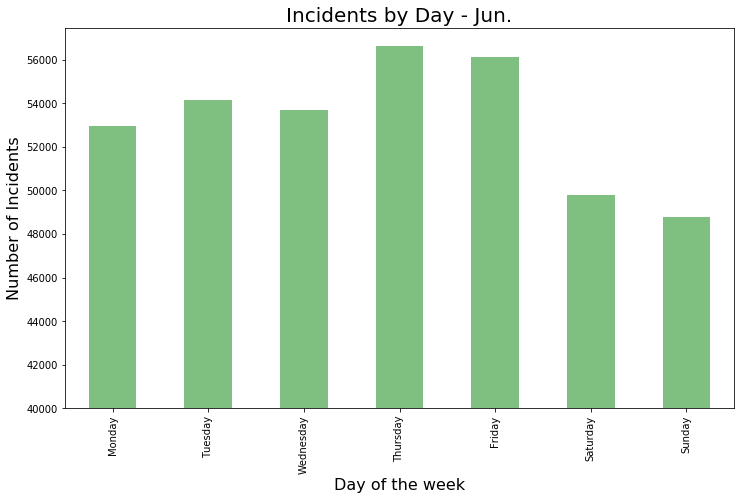

In [23]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

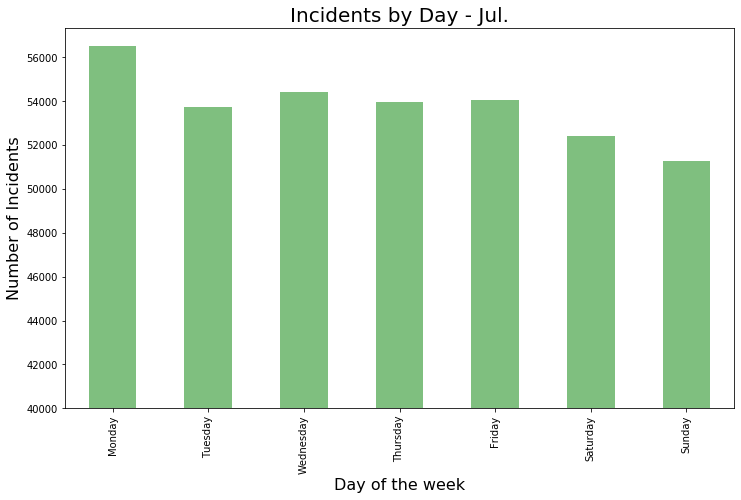

In [24]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

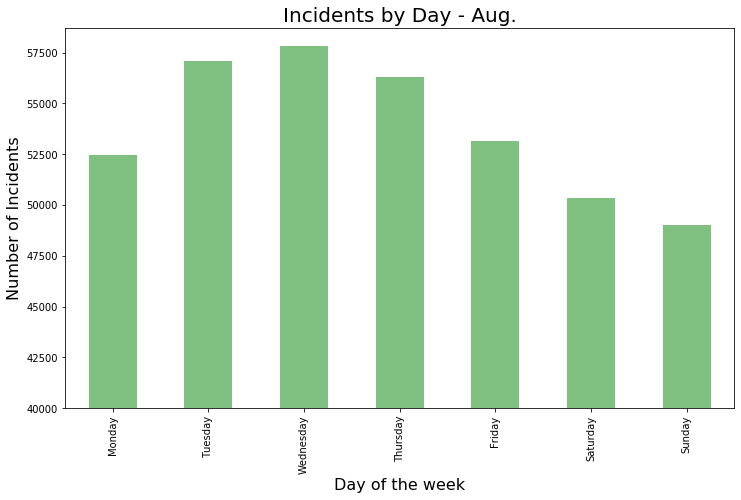

In [25]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

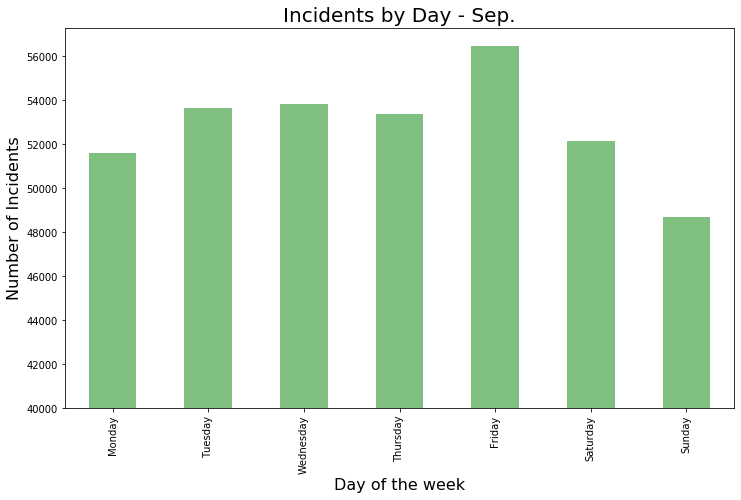

In [26]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

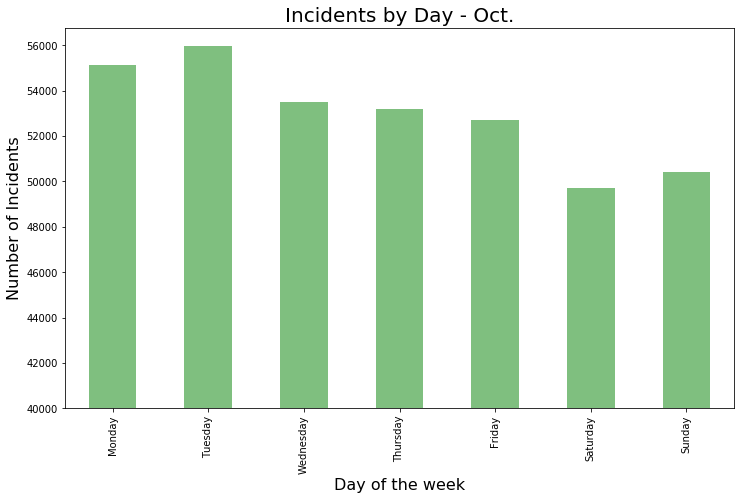

In [27]:
octo = data[data.month == 10]

# Number of incidents per day of the week
day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Oct.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

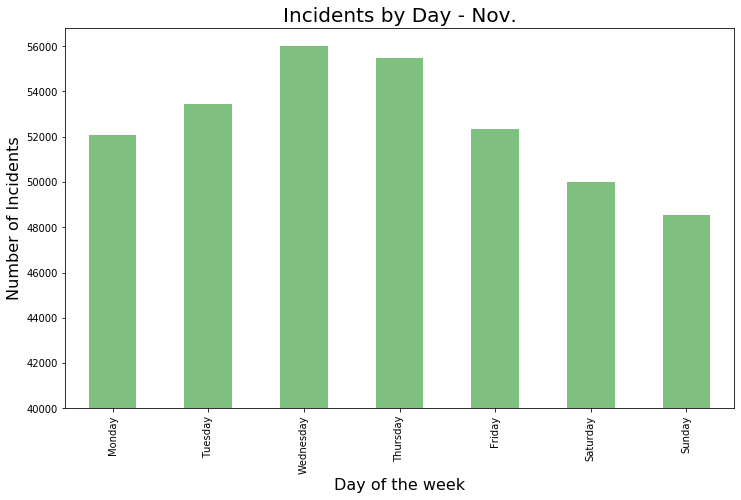

In [28]:
nov = data[data.month == 11]

# Number of incidents per day of the week
day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Nov.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

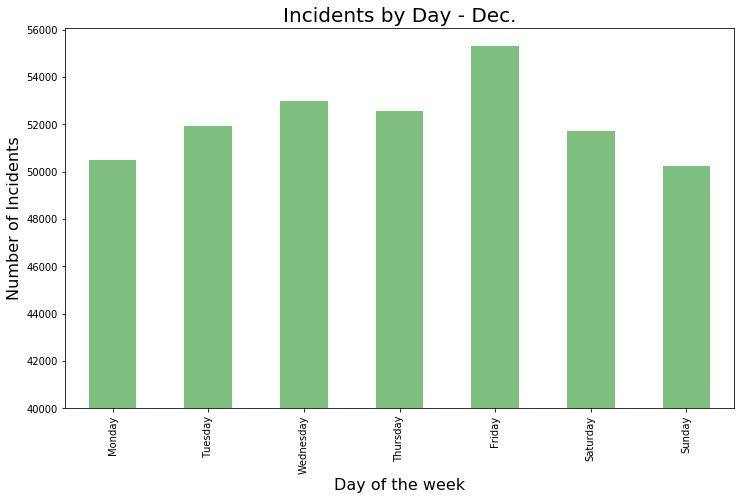

In [29]:
dec = data[data.month == 12]

# Number of incidents per day of the week
day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Dec.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [30]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
qt4 = pd.concat(q4)

In [31]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct, q4ct]

qtr = ['Q1','Q2','Q3','Q4']

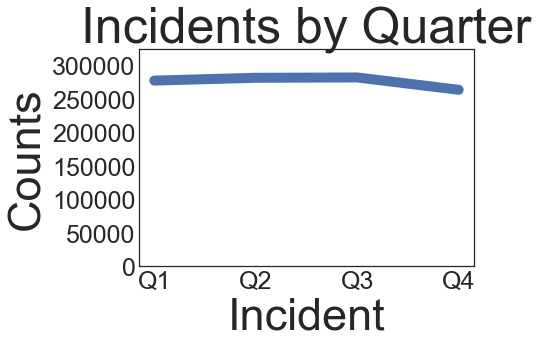

In [32]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [33]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     20927
2     22024
3     20718
4     24195
5     22898
6     21910
7     22159
8     21508
9     21484
10    21390
11    18890
12    21811
13    20483
14    21121
15    22975
16    22455
17    23121
18    21772
19    20628
20    20999
21    21568
22    21093
23    20650
24    20830
25    21762
26    22807
27    22248
28    22302
29    21462
30    22281
31    21054
32    21929
33    22098
34    20497
35    21537
36    22023
37    20404
38    21051
39    20500
40    20489
41    19747
42    20752
43    20824
44    21010
45    20213
46    20753
47    19480
48    20652
49    20084
50    21185
51    20055
52    18575
Name: call_re, dtype: int64


In [36]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [37]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,20927
2,2,22024
3,3,20718
4,4,24195
5,5,22898
6,6,21910
7,7,22159
8,8,21508
9,9,21484
10,10,21390


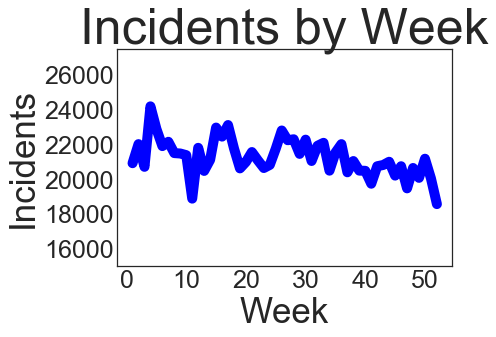

In [38]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

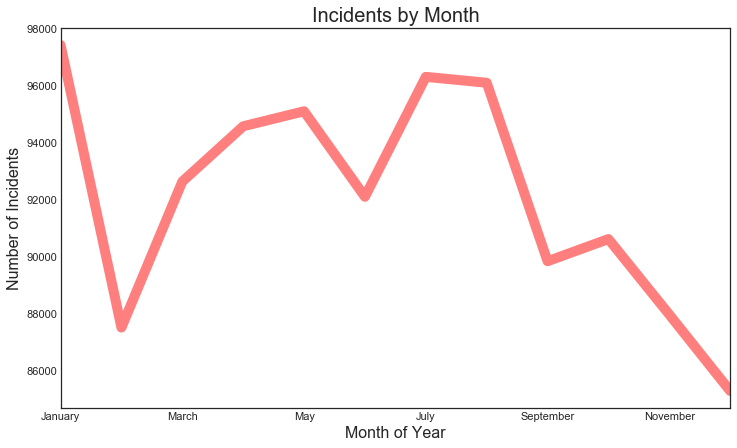

In [39]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [40]:
inc_ct = data.tc_desc.value_counts()

In [41]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [42]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

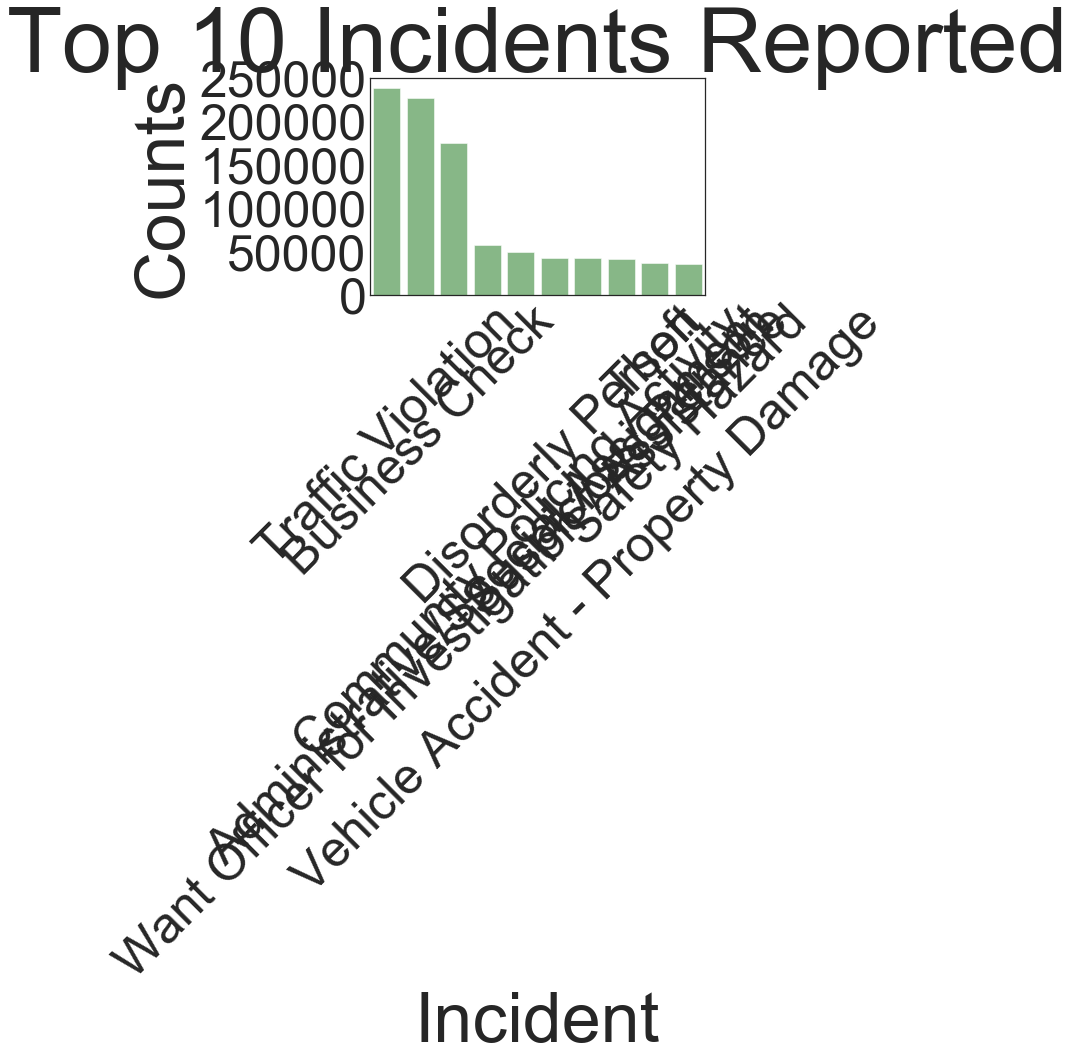

In [43]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [44]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

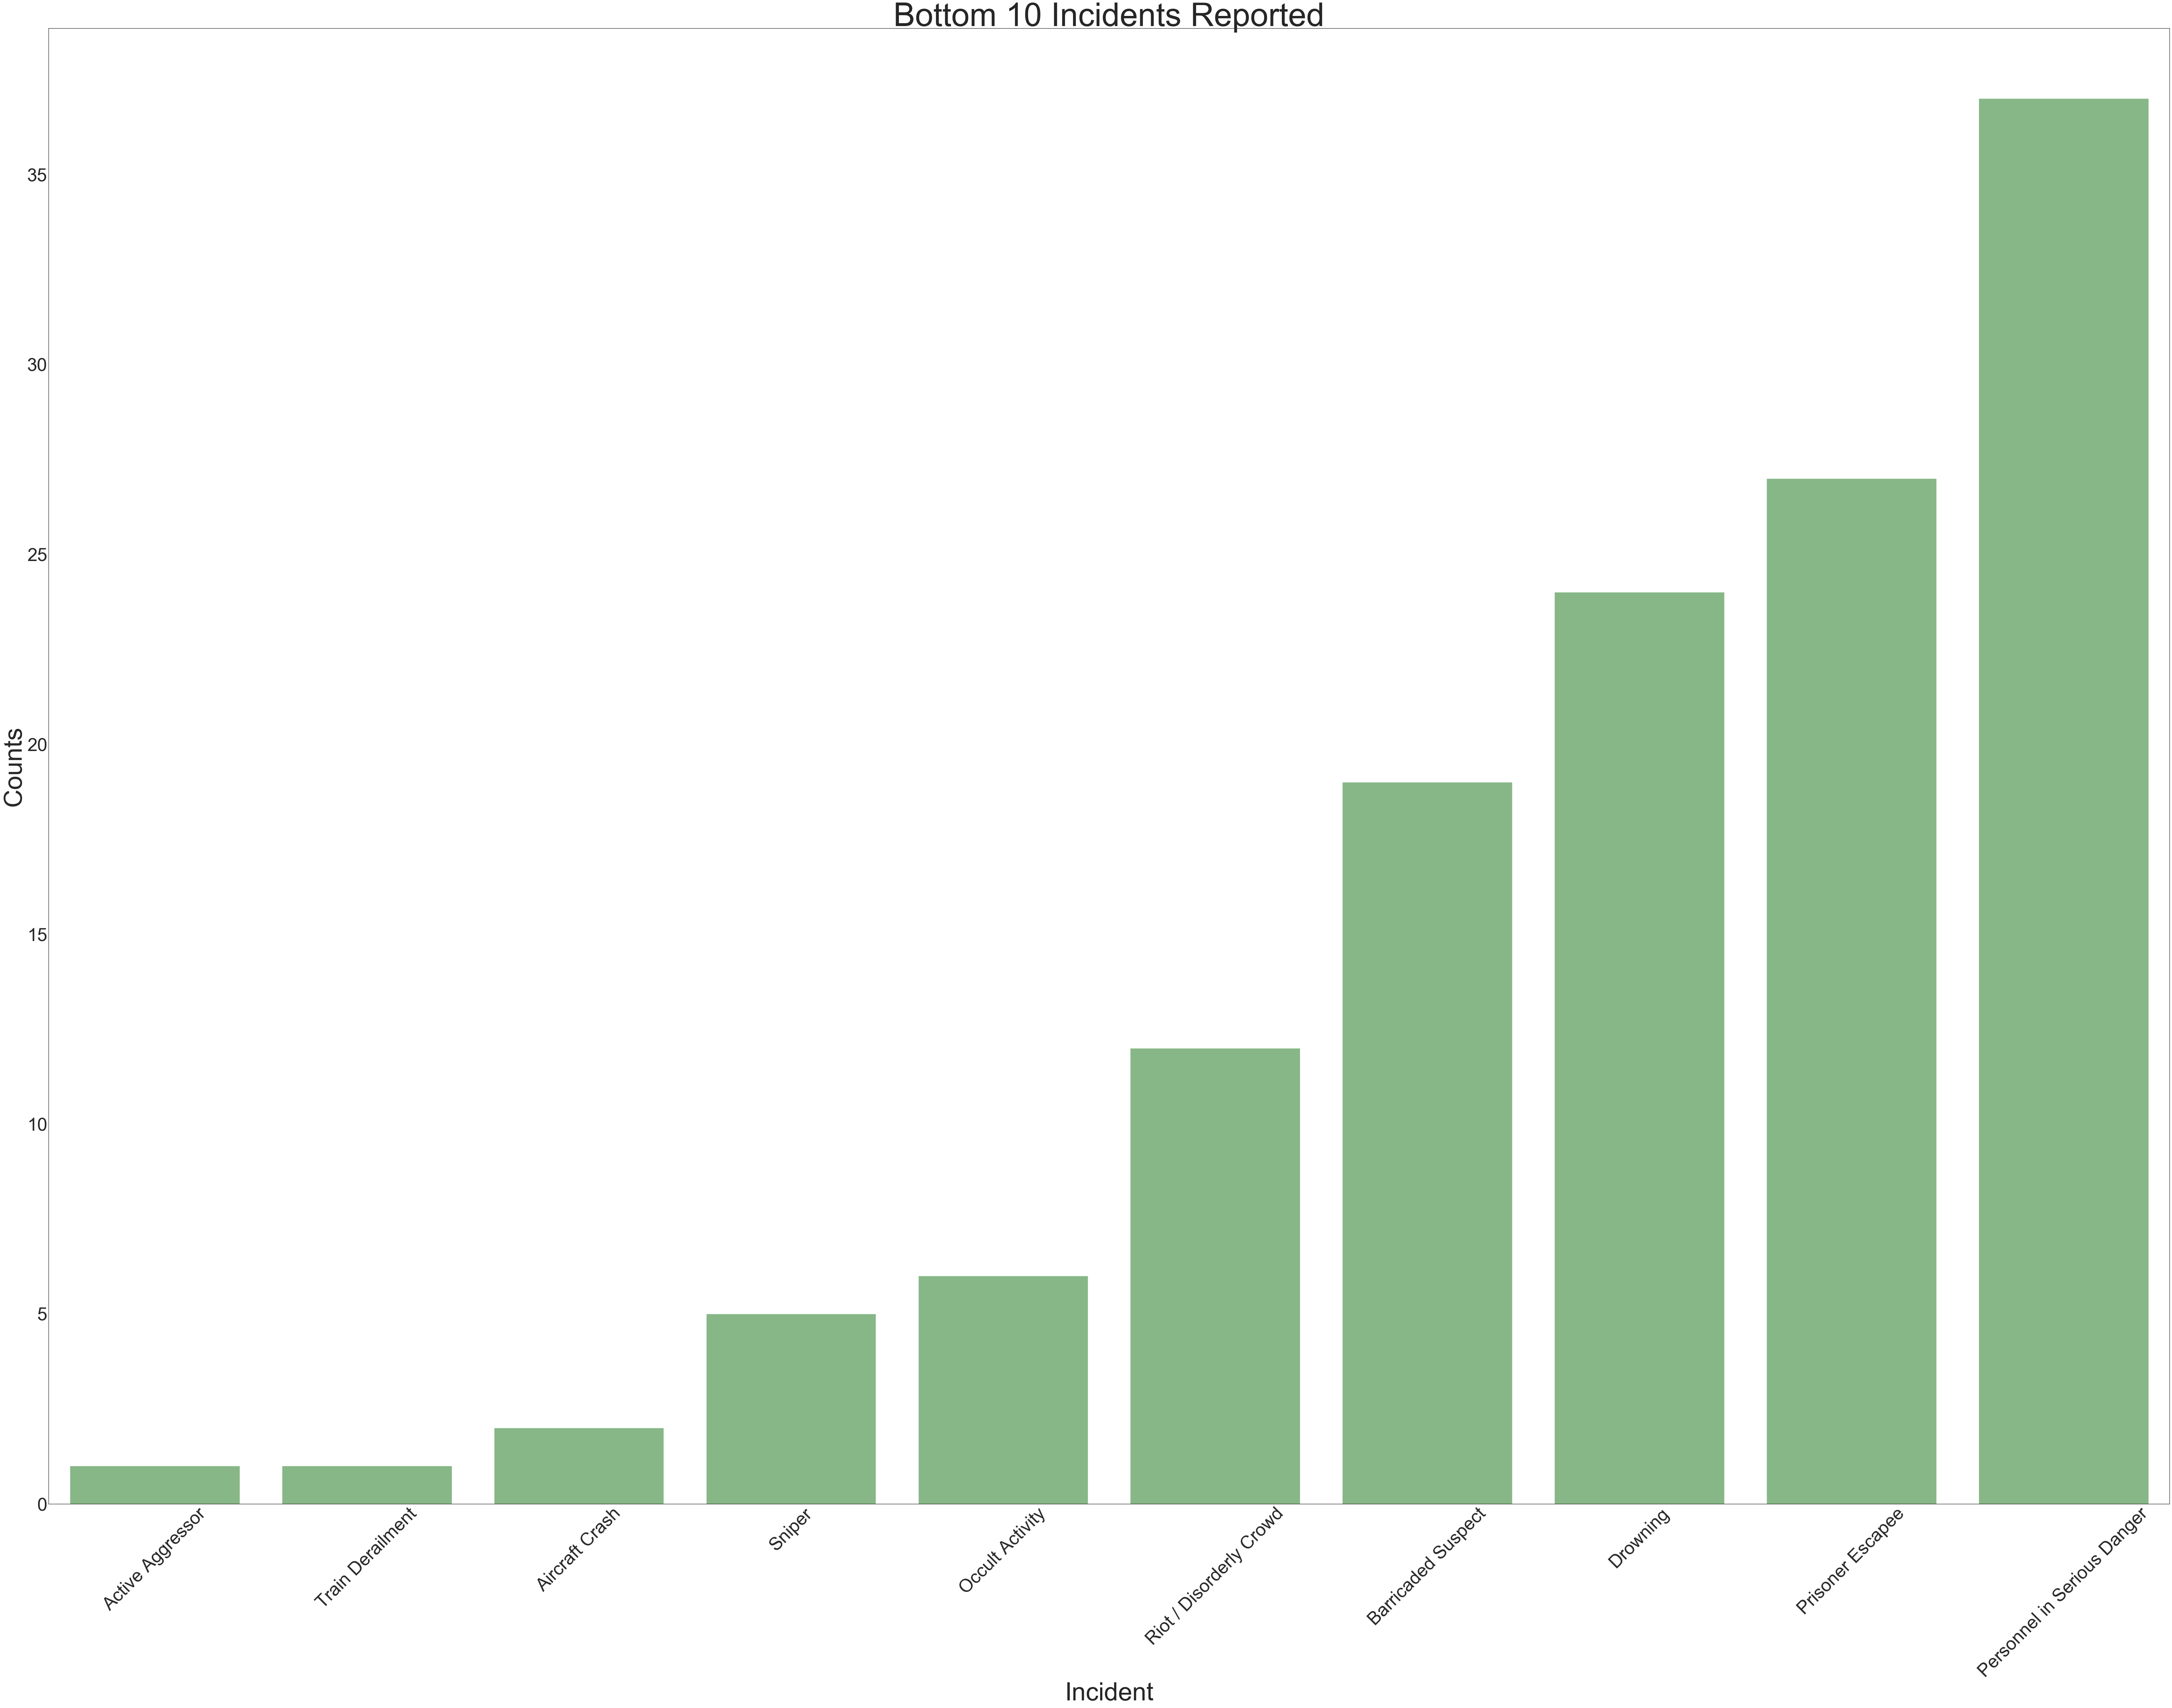

In [45]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [46]:
zip_ct = data.zip.value_counts()

In [47]:
zip_ct.shape

(39,)

In [48]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [49]:
zip_cts.head()

,zip,count
0,37203.0,110538
1,37209.0,89345
2,37211.0,81659
3,37207.0,79505
4,37115.0,66275


In [50]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

27055.5641025641


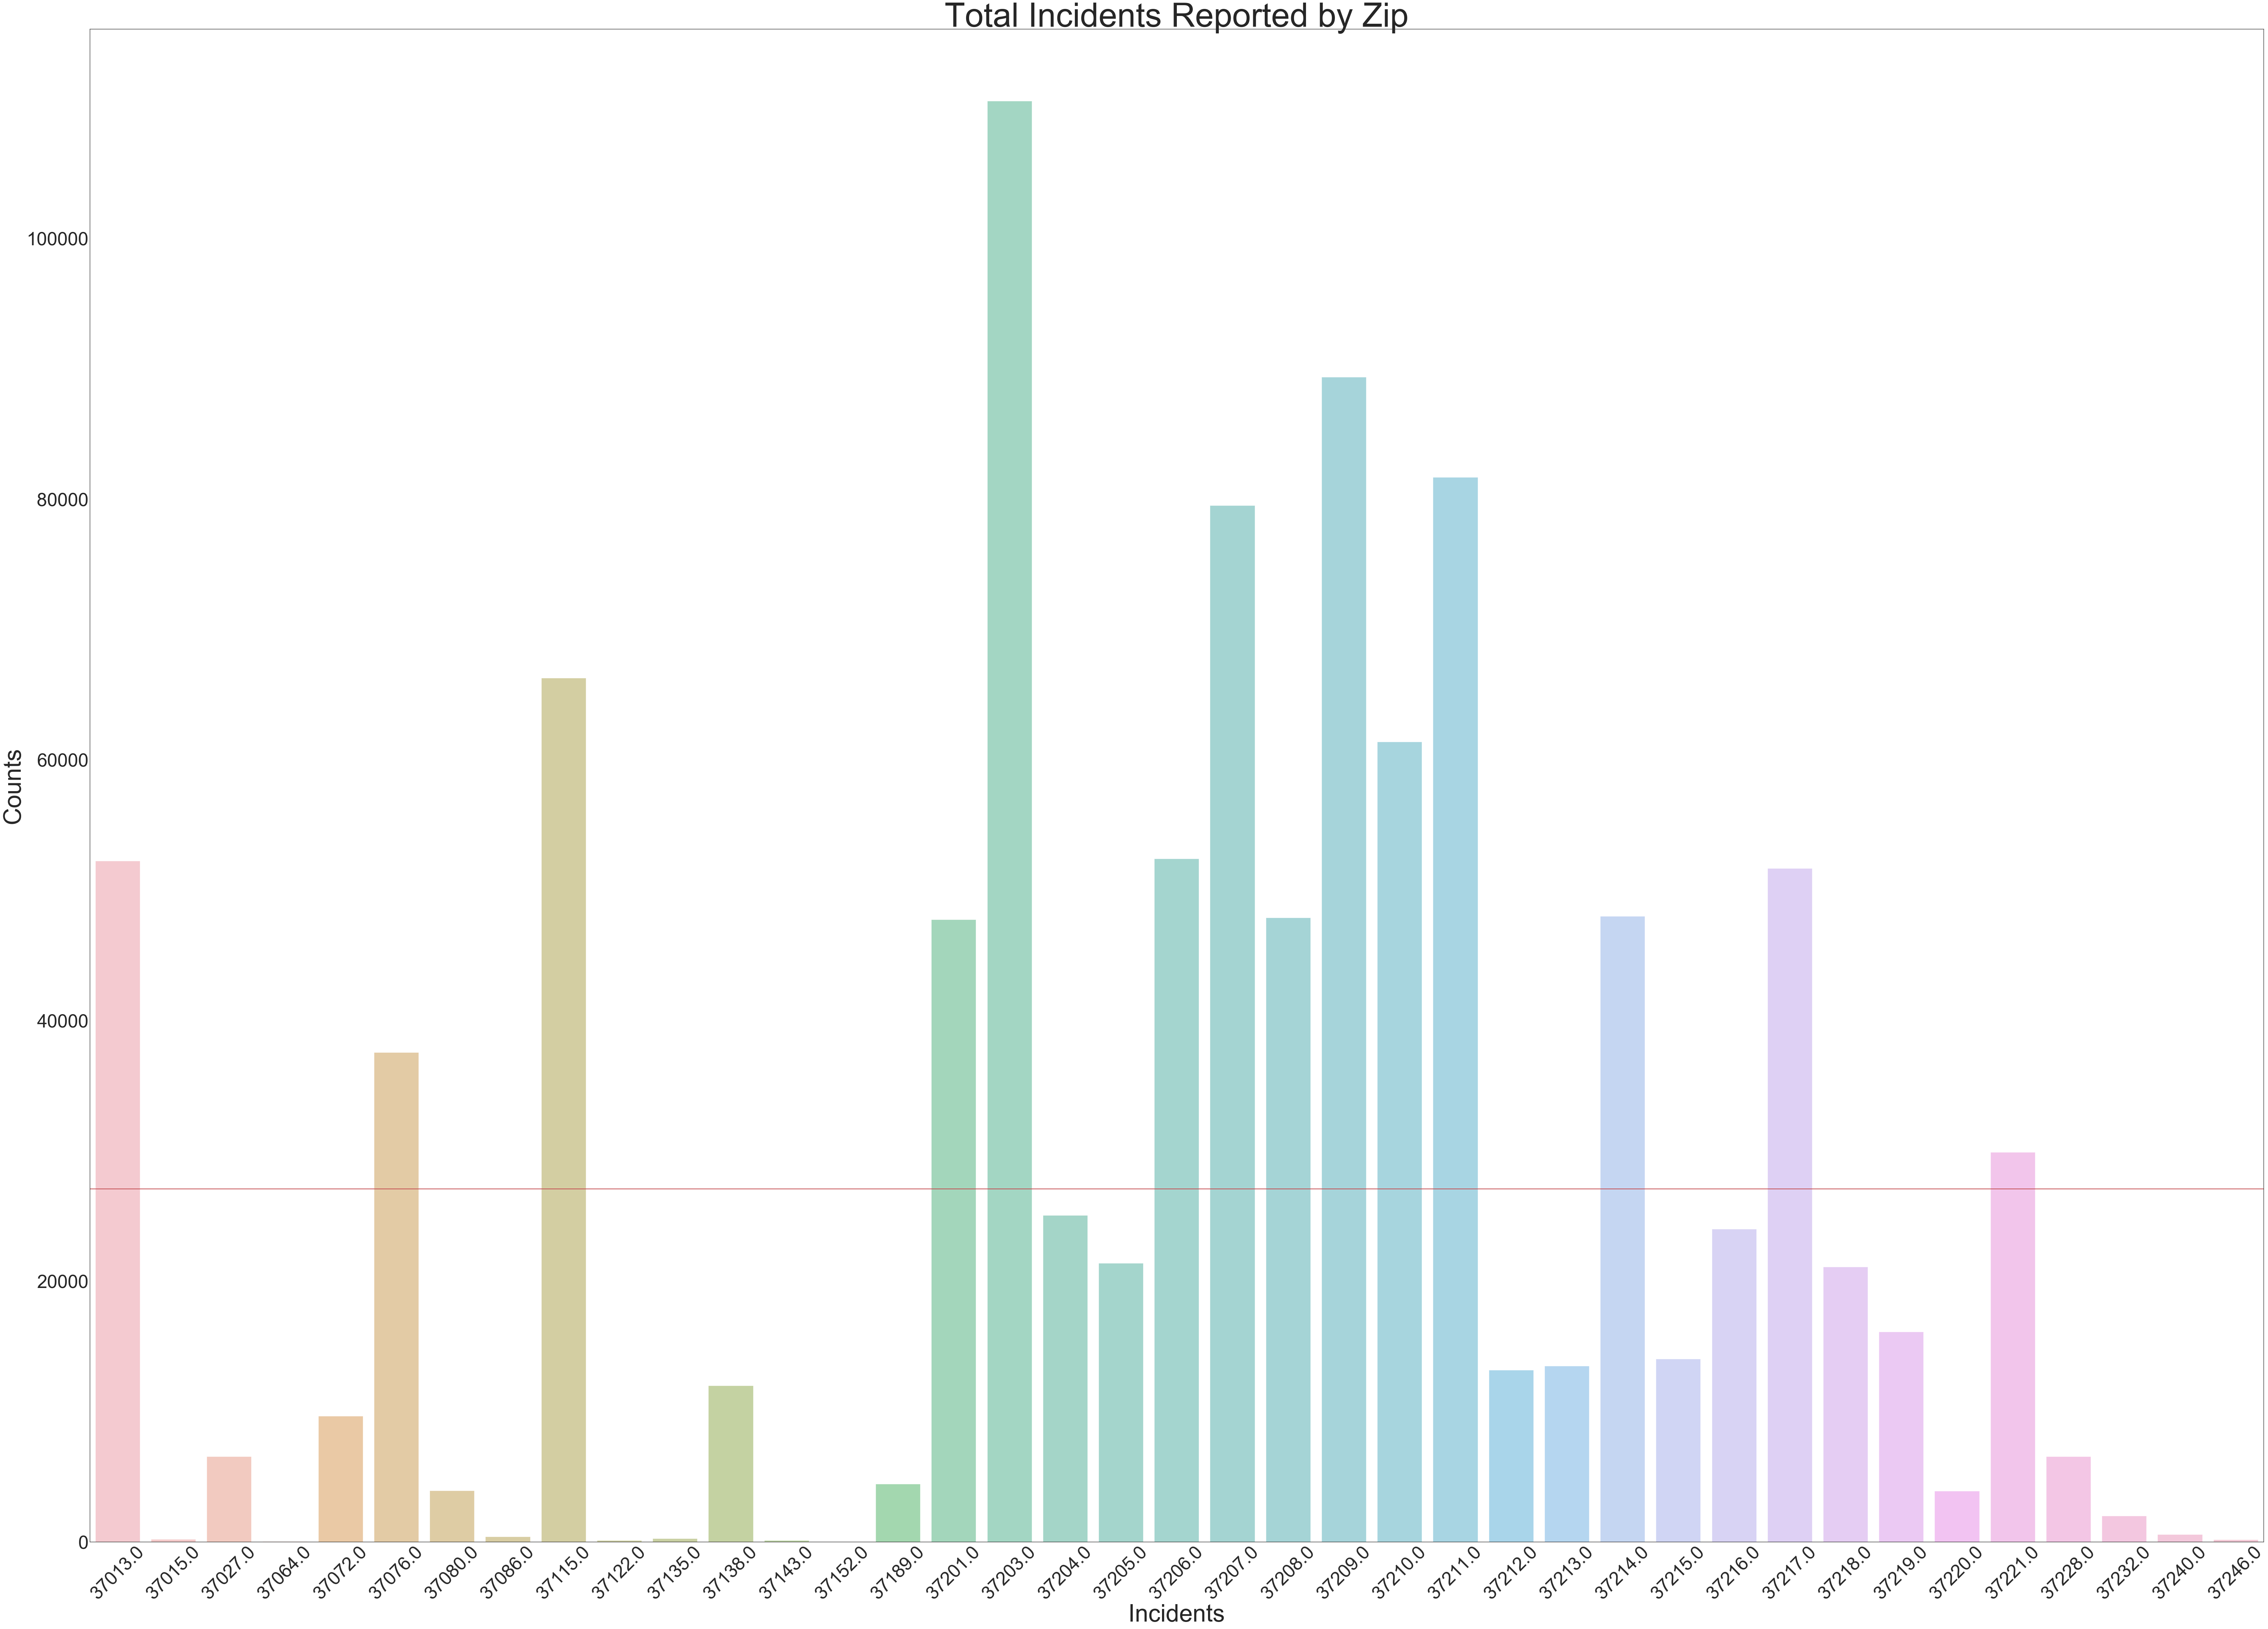

In [51]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [52]:
#pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [53]:
#pop_zips.head()

#### Merge zip_cts to pop_zips

In [54]:
#zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [55]:
# only focus on this year's info

#zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2015','y-2014','y-2013','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [56]:
#zips_all.head()

#### Calculate crime rate by zipcode

In [57]:
#zips_all['crime_rate'] = ((zips_all['count']/zips_all['y-2016'])*100000)

In [58]:
#zips_all.head()

In [59]:
#sns.set_style("white")
#plt.style.use('seaborn-white')


#g = sns.barplot(x = "zip",y = "crime_rate", data = zips_all, ci = None, alpha = 0.5)
#plt.xticks(rotation=45, fontsize = 50)
#plt.yticks(rotation=0, fontsize = 50)
#sns.set(rc={'figure.figsize':(90, 70)})
#plt.title("Crime Rate by Zip", fontsize = 90)
#plt.xlabel("Zip Code", fontsize = 65)
#plt.ylabel("Crime Rate", fontsize = 65)
#plt.show()